In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

dataset = pd.read_csv("RecommendationEngine.csv")
dataset

,Department,HomeLocation,ManagerName,HomeSiteLocationAreaRequested,Recommendation
0,Sales,Atlanta,Mike Smith1,Atlanta,Approve
1,Engineering,New York,Purna Doe1,Dallas,Review
2,Marketing,New York,Purna Doe1,New York,Review
3,Engineering,San Jose,Purna Doe1,San Jose,Review
4,Engineering,New York,Purna Doe1,Chicago,Review
5,Field Technician,San Jose,Mike Smith1,Bengaluru,Approve
6,Field Technician,San Jose,Mike Smith1,Hyderabad,Approve
7,Field Technician,New York,Mike Smith1,Bengaluru,Approve
8,Field Technician,New York,Mike Smith1,Hyderabad,Approve
9,Field Technician,Chicago,Purna Doe1,Kerala,Approve


In [2]:
from sklearn import preprocessing
allColumns={}
EncodedDataSet=pd.DataFrame()
for colname in dataset:
    
    le = preprocessing.LabelEncoder()
    le.fit(dataset[colname])
    dict={}
    for index,class_ in enumerate(le.classes_):
        #print(index,":",class_)
        dict[index]=class_
    allColumns[colname]=dict
    #print(dict)
    #print(le.classes_)
    EncodedDataSet[colname]=le.transform(dataset[colname])

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(EncodedDataSet.iloc[:,:4],EncodedDataSet['Recommendation'], test_size = 0.2)
print(
    " x_train data set : ",
     x_train.shape,
     "\n",
    "x_test data set : ",
    x_test.shape,
     "\n",
    " y_train data set : ",
     y_train.shape,
     "\n",
    "y_test data set : ",
    y_test.shape
)

 x_train data set :  (12, 4) 
 x_test data set :  (3, 4) 
  y_train data set :  (12,) 
 y_test data set :  (3,)


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [6]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

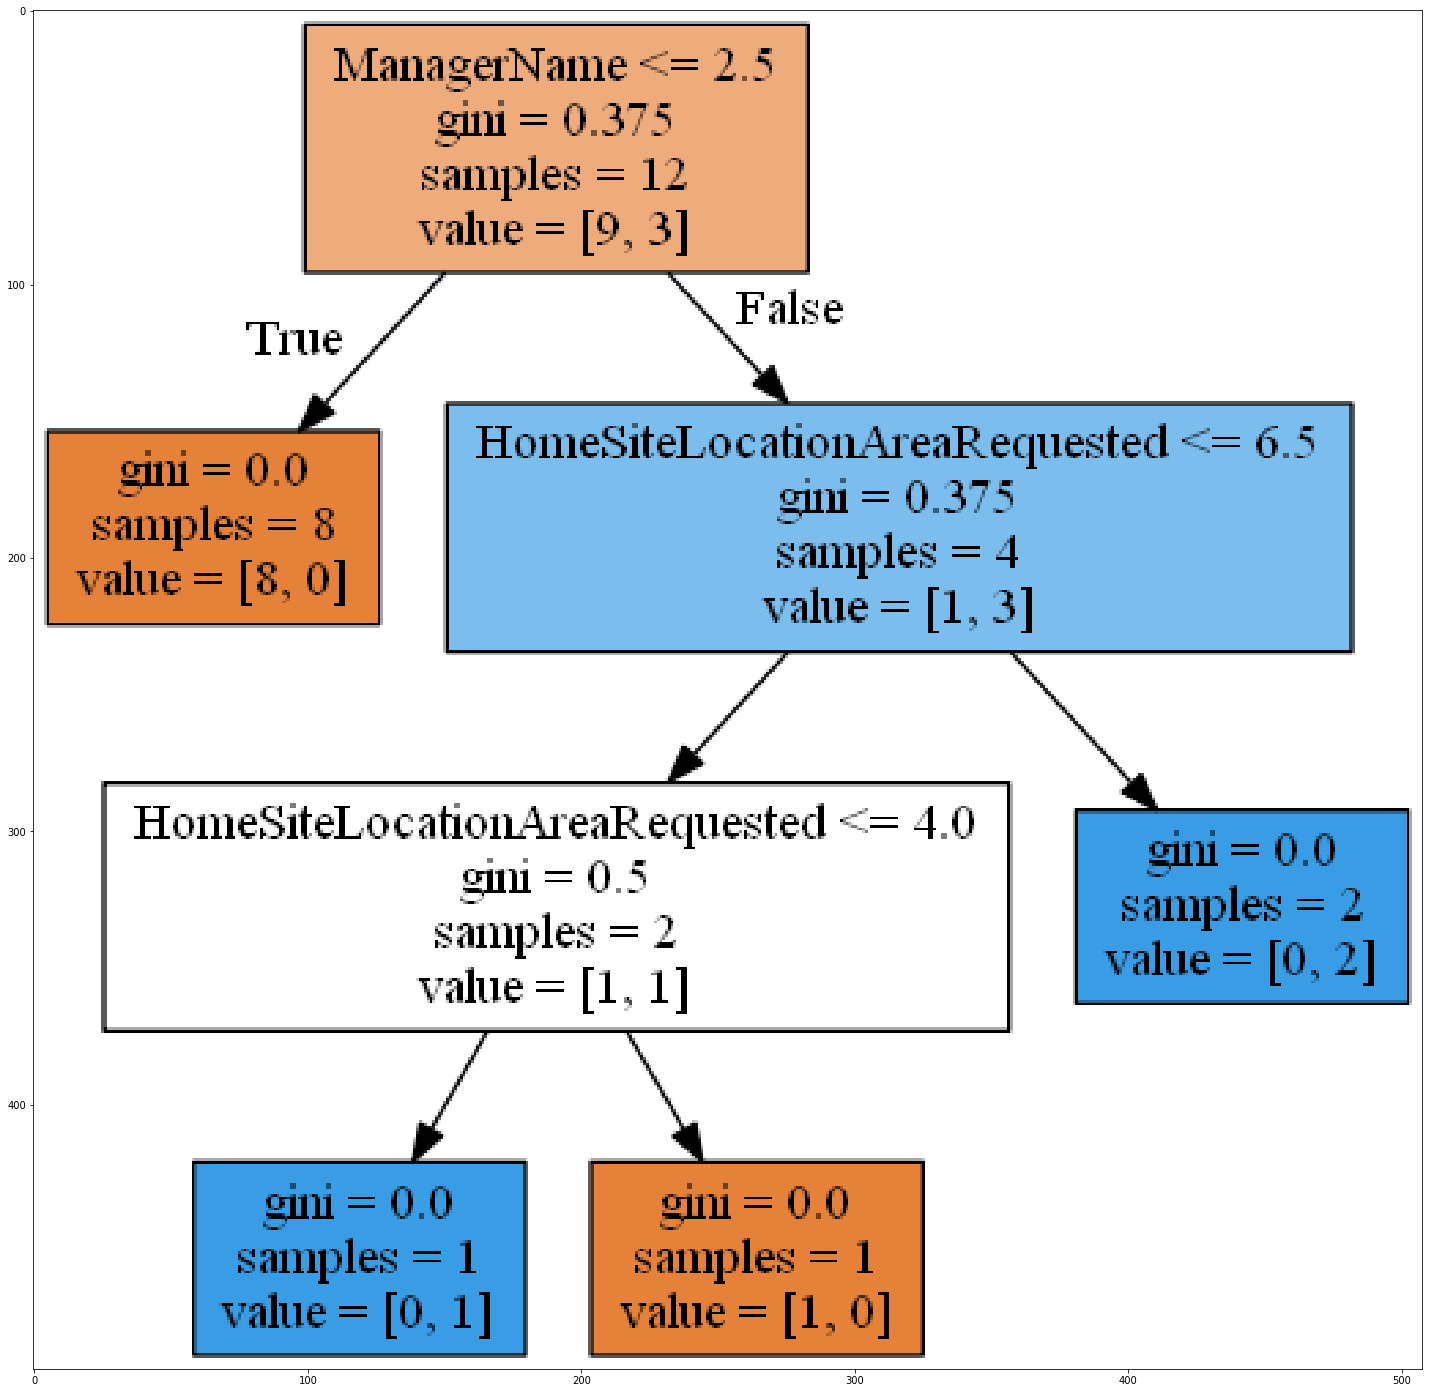

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
decision_tree = tree.export_graphviz(clf, out_file='tree.dot', feature_names=x_train.columns, filled=True, max_depth=8)

# converting the dot image to png format
#!dot -Tpng tree.dot -o tree.png

#from subprocess import check_call
#check_call(['dot','-Tpng','tree.dot','-o','tree.png'])


import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

#plotting the decision tree
image = plt.imread('tree.png')
plt.figure(figsize=(25,25))
plt.imshow(image)